In [22]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import geobr
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import pandas as pd
import re

In [24]:
states = geobr.read_state(year=2020)
regions = geobr.read_region(year=2020)

In [32]:
def dataset(minimum, name):
    mean_regions = {"North": 0, "Northeast": 0, "Midwest": 0, "South": 0, "Southeast": 0}
    for p in pathlib.Path("csv").rglob(f"{name}*{minimum}.csv"):
        df = pd.read_csv(p, sep=';', header = 0)
        levels = np.max(np.unique(df["fold"]))
        mean = len(df) / levels
        m = re.search(r"\+([a-zA-Z]+)\+", p.stem)
        if m:
            found = m.group(1)
            mean_regions[found.capitalize()] = mean
    return mean_regions

d = dataset(5, "regions")
regions["name_region"] = d.keys()
regions["total"] = d.values()

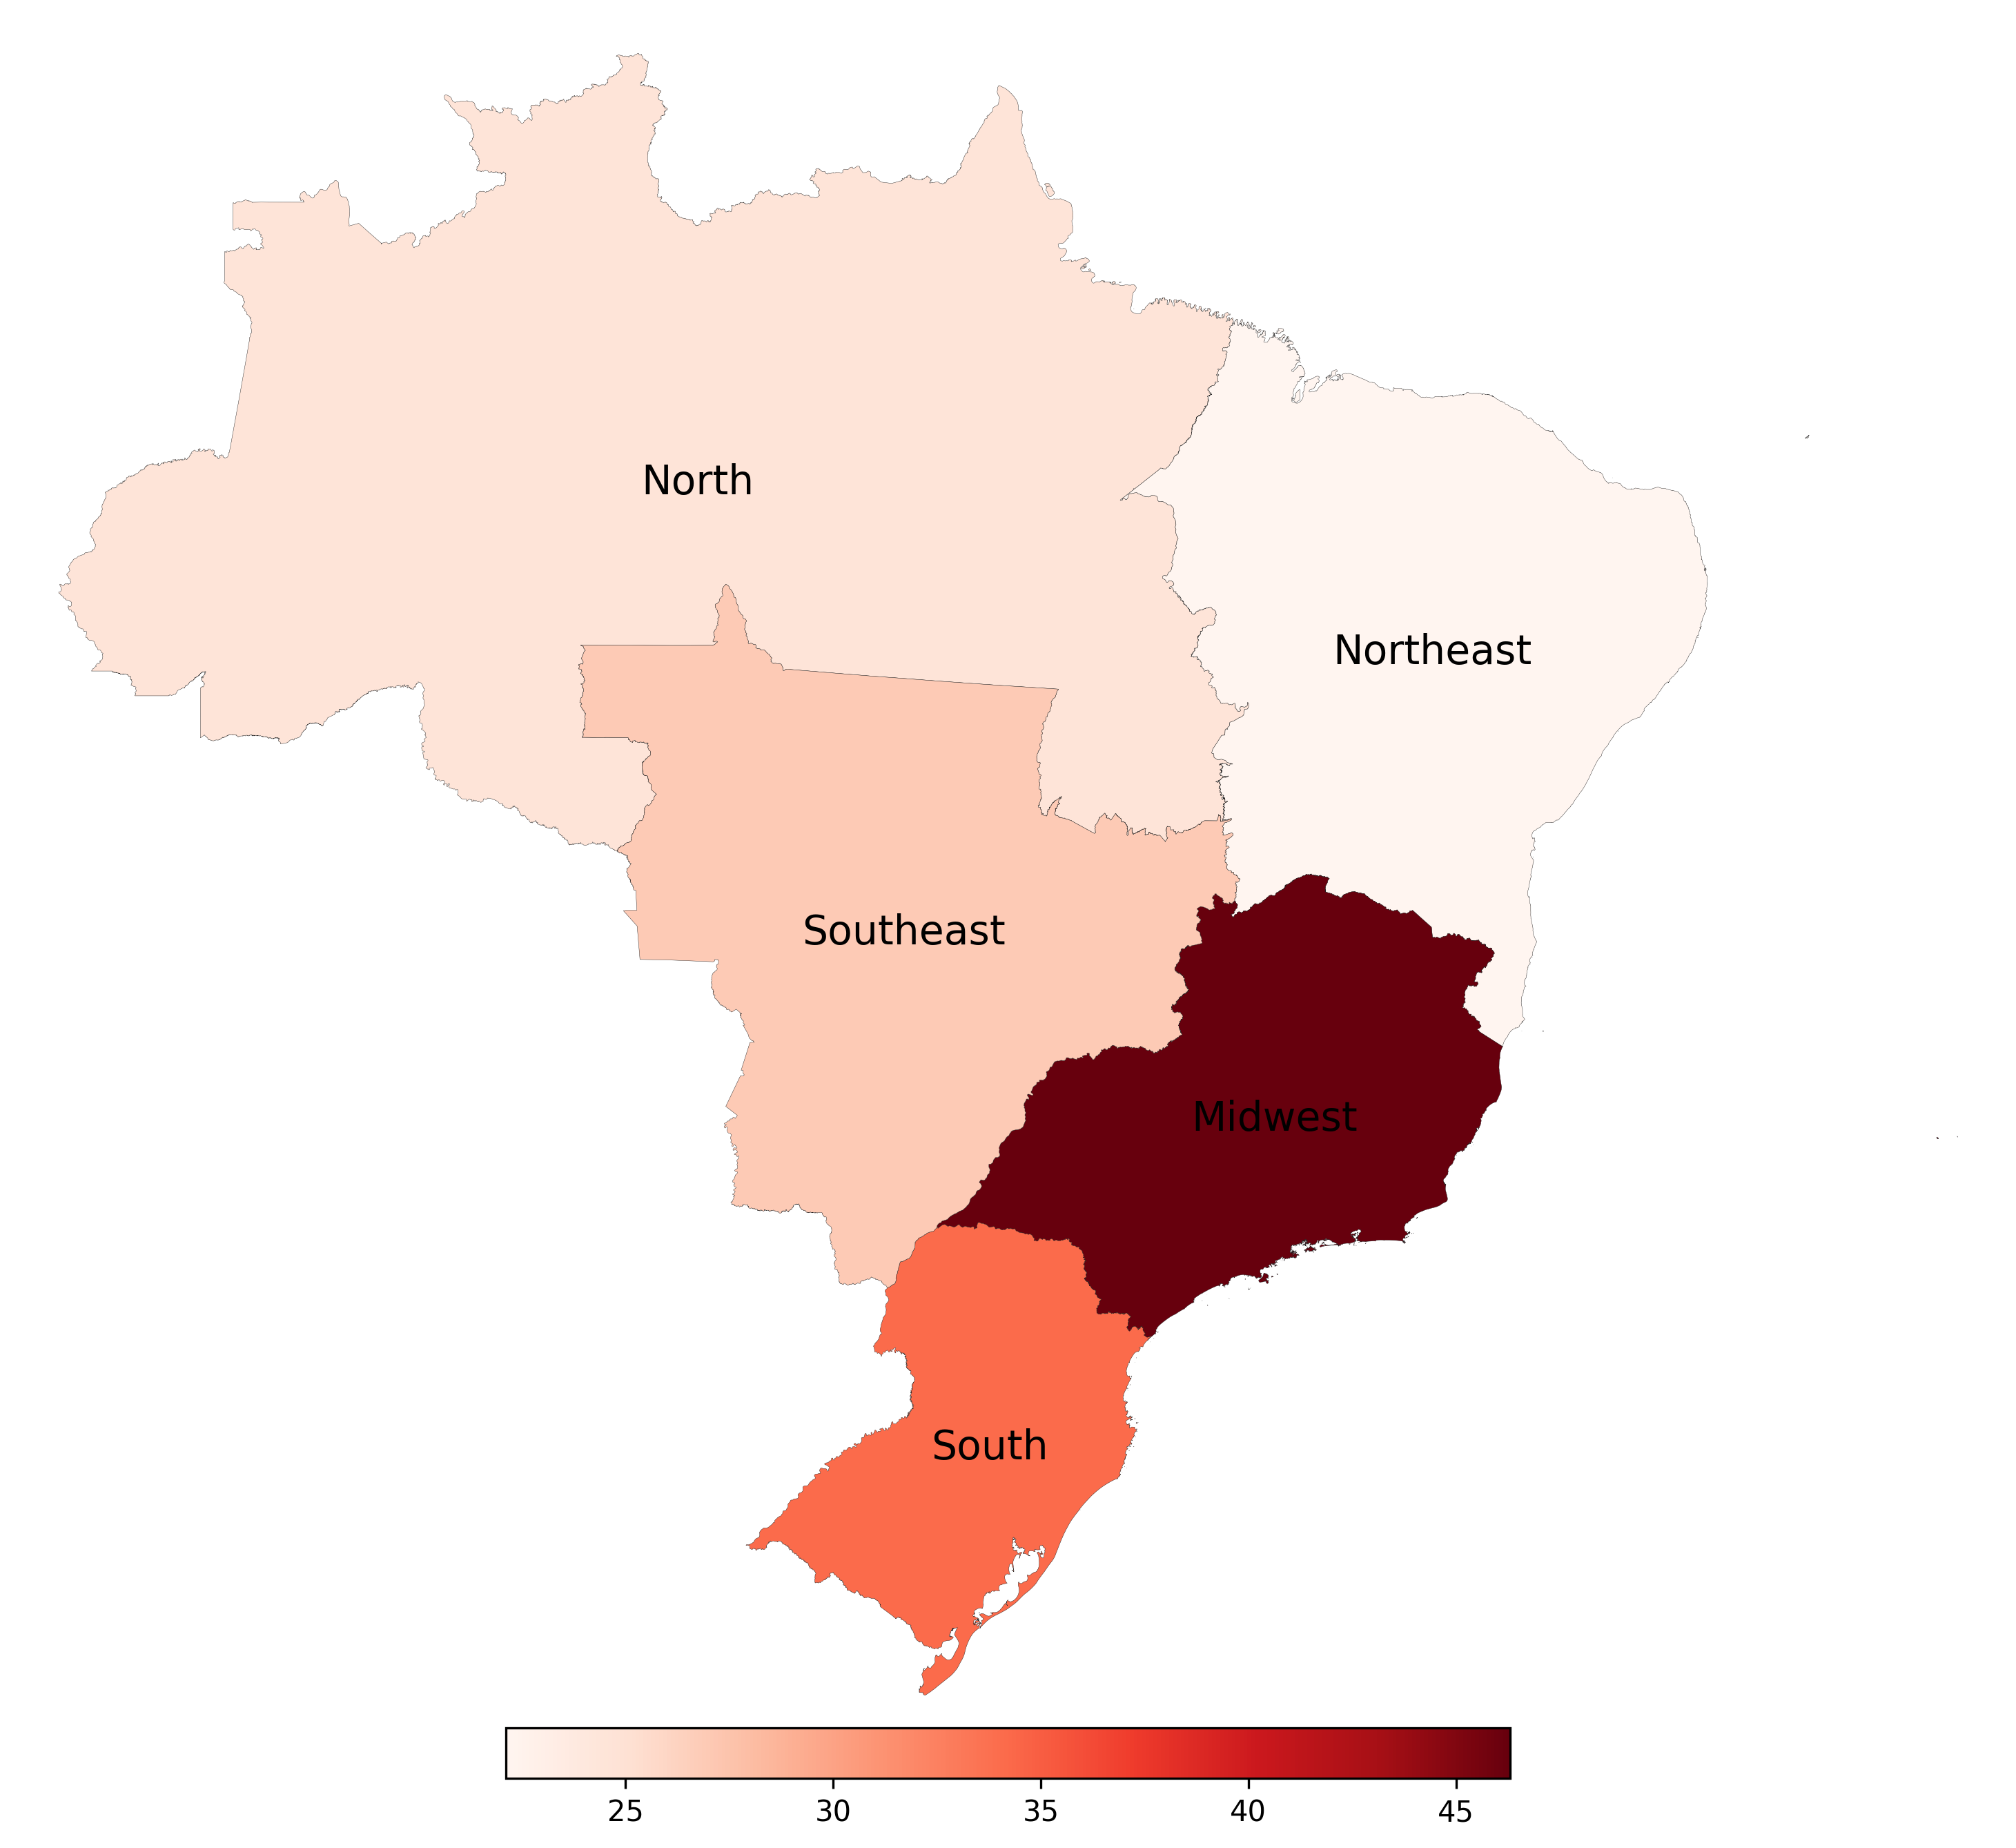

In [34]:
fig, ax = plt.subplots(sharex=True, figsize=(10,10), dpi=300, sharey=False)
regions.plot(column='total', cmap='Reds', ax=ax,
             linewidth=0.1, edgecolor='0.1', legend=True,
             legend_kwds={'shrink':0.5, 'orientation': 'horizontal', 'pad': 0.0})
regions.apply(lambda x: ax.annotate(text=x['name_region'],
                                    xy=np.subtract(x.geometry.centroid.coords[0], (-0.4, 0.6)),
                                    ha='center', fontsize=14
                                    ), axis=1)

ax.margins(0.02)
ax.set_aspect('equal')
ax.axis('off')
plt.tight_layout()
plt.savefig("regions.svg", format="svg")